In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

In [3]:
data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.tail(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.dropna(inplace = True)

In [7]:
data.shape

(8790, 10)

In [8]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['date_added'].dtype

dtype('<M8[ns]')

In [11]:
data.describe(include = 'all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,NaN,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,NaN,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,2019-05-17 21:44:01.638225408,2014.183163,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2019-07-03 00:00:00,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2020-08-19 18:00:00,2019.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN


In [12]:
types = data['type'].value_counts().reset_index()
types

,type,count
0,Movie,6126
1,TV Show,2664


In [13]:
countries = data['country'].value_counts().reset_index()
countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
...,...,...
81,Iran,1
82,West Germany,1
83,Greece,1
84,Zimbabwe,1


In [14]:
data.groupby('type')['country'].value_counts().reset_index()

,type,country,count
0,Movie,United States,2395
1,Movie,India,976
2,Movie,United Kingdom,387
3,Movie,Not Given,257
4,Movie,Canada,187
...,...,...,...
133,TV Show,Luxembourg,1
134,TV Show,Puerto Rico,1
135,TV Show,Croatia,1
136,TV Show,Mauritius,1


In [15]:
data.groupby('type')['director'].value_counts().reset_index()

,type,director,count
0,Movie,Not Given,173
1,Movie,Rajiv Chilaka,19
2,Movie,"Raúl Campos, Jan Suter",18
3,Movie,Suhas Kadav,16
4,Movie,Marcus Raboy,15
...,...,...,...
4576,TV Show,Mark Tonderai,1
4577,TV Show,Mark Lewis,1
4578,TV Show,Maribel Sánchez-Maroto,1
4579,TV Show,Mariano Barroso,1


In [16]:
directors = data[data['director'] != 'Not Given'][['type','director']].value_counts().sort_values(ascending=False).reset_index()
directors

,type,director,count
0,Movie,Rajiv Chilaka,19
1,Movie,"Raúl Campos, Jan Suter",18
2,Movie,Suhas Kadav,16
3,Movie,Marcus Raboy,15
4,Movie,Jay Karas,14
...,...,...,...
4574,Movie,Richard Curtis,1
4575,Movie,"William Wyler, John Sturges",1
4576,Movie,Richard Donner,1
4577,Movie,"Richard Finn, Tim Maltby",1


In [17]:
top_10_directors = directors.head(10)
top_10_directors

,type,director,count
0,Movie,Rajiv Chilaka,19
1,Movie,"Raúl Campos, Jan Suter",18
2,Movie,Suhas Kadav,16
3,Movie,Marcus Raboy,15
4,Movie,Jay Karas,14
5,TV Show,Alastair Fothergill,14
6,Movie,Cathy Garcia-Molina,13
7,Movie,Youssef Chahine,12
8,Movie,Martin Scorsese,12
9,Movie,Jay Chapman,12


In [18]:
top_10_movie_directors = directors[directors['type'] == 'Movie'].head(10)
top_10_movie_directors

,type,director,count
0,Movie,Rajiv Chilaka,19
1,Movie,"Raúl Campos, Jan Suter",18
2,Movie,Suhas Kadav,16
3,Movie,Marcus Raboy,15
4,Movie,Jay Karas,14
6,Movie,Cathy Garcia-Molina,13
7,Movie,Youssef Chahine,12
8,Movie,Martin Scorsese,12
9,Movie,Jay Chapman,12
10,Movie,Steven Spielberg,11


In [19]:
top_10_TV_shows_directors = directors[directors['type'] == 'TV Show'].head(10)
top_10_TV_shows_directors

,type,director,count
5,TV Show,Alastair Fothergill,14
80,TV Show,"Mark Thornton, Todd Kauffman",5
183,TV Show,Stan Lathan,3
475,TV Show,Hsu Fu-chun,2
476,TV Show,Iginio Straffi,2
533,TV Show,Shin Won-ho,2
547,TV Show,Ken Burns,2
561,TV Show,Rob Seidenglanz,2
2714,TV Show,Juan Carlos Medina,1
2721,TV Show,Thomas Astruc,1


In [20]:
data['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

In [21]:
data['country'].nunique()

86

In [22]:
data['director'].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [23]:
data['director'].nunique()

4528

In [24]:
data['release_year'].unique()

array([2020, 2021, 1993, 2019, 2013, 2014, 2018, 1998, 2010, 2017, 1997,
       1996, 1975, 1978, 1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011,
       2008, 2009, 2007, 2005, 2006, 2016, 1994, 2015, 1982, 1989, 1990,
       1991, 1999, 1986, 1984, 1980, 1961, 2000, 1995, 1985, 1925, 1992,
       1976, 1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968,
       1965, 1945, 1946, 1942, 1955, 1944, 1947, 1943])

In [25]:
data['release_year'].nunique()

74

In [26]:
countries = data[data['country'] != 'Not Given'][['type','country']].value_counts().sort_values(ascending=False).reset_index()
countries

,type,country,count
0,Movie,United States,2395
1,Movie,India,976
2,TV Show,United States,845
3,Movie,United Kingdom,387
4,TV Show,Pakistan,350
...,...,...,...
131,Movie,Paraguay,1
132,TV Show,Switzerland,1
133,Movie,Namibia,1
134,Movie,Slovenia,1


In [27]:
top_10_countries = countries.head(10)
top_10_countries

,type,country,count
0,Movie,United States,2395
1,Movie,India,976
2,TV Show,United States,845
3,Movie,United Kingdom,387
4,TV Show,Pakistan,350
5,TV Show,United Kingdom,251
6,Movie,Canada,187
7,TV Show,Japan,172
8,TV Show,South Korea,165
9,Movie,France,148


In [28]:
top_10_movie_countries = countries[countries['type'] == 'Movie'].head(10)
top_10_movie_countries

,type,country,count
0,Movie,United States,2395
1,Movie,India,976
3,Movie,United Kingdom,387
6,Movie,Canada,187
9,Movie,France,148
10,Movie,Spain,129
11,Movie,Egypt,109
12,Movie,Nigeria,96
13,Movie,Mexico,90
14,Movie,Japan,87


In [29]:
top_10_TV_show_countries = countries[countries['type'] == 'TV Show'].head(10)
top_10_TV_show_countries

,type,country,count
2,TV Show,United States,845
4,TV Show,Pakistan,350
5,TV Show,United Kingdom,251
7,TV Show,Japan,172
8,TV Show,South Korea,165
16,TV Show,Canada,84
18,TV Show,India,81
23,TV Show,Taiwan,71
24,TV Show,France,65
29,TV Show,Spain,53


In [30]:
release_years = data['release_year'].value_counts().sort_values(ascending = False).reset_index()
release_years

,release_year,count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
...,...,...
69,1966,1
70,1959,1
71,1925,1
72,1947,1


In [31]:
top_10_years = release_years.head(10)
top_10_years

,release_year,count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
5,2021,592
6,2015,555
7,2014,352
8,2013,286
9,2012,236


In [32]:
data['duration'].unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

In [33]:
data['duration'].nunique()

220

In [34]:
durations = data.groupby(['type', 'duration'])['duration'].value_counts().sort_values(ascending = False).reset_index()
durations

,type,duration,count
0,TV Show,1 Season,1791
1,TV Show,2 Seasons,421
2,TV Show,3 Seasons,198
3,Movie,90 min,152
4,Movie,97 min,146
...,...,...,...
215,Movie,205 min,1
216,Movie,203 min,1
217,Movie,201 min,1
218,Movie,9 min,1


In [35]:
top_10_durations = durations.head(10)
top_10_durations

,type,duration,count
0,TV Show,1 Season,1791
1,TV Show,2 Seasons,421
2,TV Show,3 Seasons,198
3,Movie,90 min,152
4,Movie,97 min,146
5,Movie,93 min,146
6,Movie,94 min,146
7,Movie,91 min,144
8,Movie,95 min,137
9,Movie,96 min,130


In [36]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [37]:
data['rating'].nunique()

14

In [38]:
ratings = data.groupby(['type', 'rating'])['rating'].value_counts().sort_values(ascending = False).reset_index()
ratings

,type,rating,count
0,Movie,TV-MA,2062
1,Movie,TV-14,1427
2,TV Show,TV-MA,1143
3,Movie,R,797
4,TV Show,TV-14,730
5,Movie,TV-PG,540
6,Movie,PG-13,490
7,TV Show,TV-PG,321
8,Movie,PG,287
9,TV Show,TV-Y7,194


In [39]:
top_10_ratings = ratings.head(10)
top_10_ratings

,type,rating,count
0,Movie,TV-MA,2062
1,Movie,TV-14,1427
2,TV Show,TV-MA,1143
3,Movie,R,797
4,TV Show,TV-14,730
5,Movie,TV-PG,540
6,Movie,PG-13,490
7,TV Show,TV-PG,321
8,Movie,PG,287
9,TV Show,TV-Y7,194


In [40]:
genres = data.groupby(['listed_in', 'type'])['listed_in'].value_counts().reset_index()
genres

,listed_in,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [41]:
top_10_genres = genres.sort_values(by = 'count', ascending = False).head(10)
top_10_genres

,listed_in,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
421,Kids' TV,TV Show,219
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180


Text(0.5, 1.0, 'Types')

<Figure size 2000x600 with 0 Axes>

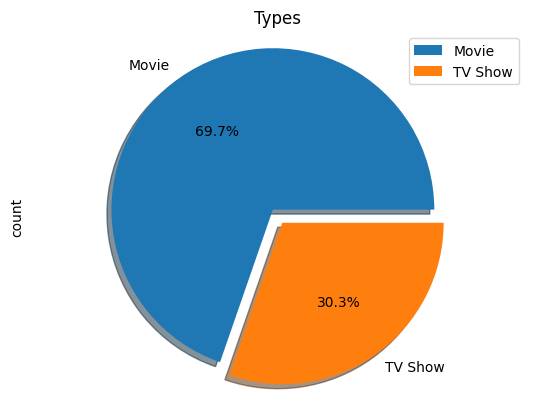

In [42]:
plt.figure(figsize=(20,6))
types.plot.pie(y='count', shadow=True, autopct='%1.1f%%',labels=['Movie','TV Show'], explode=[0,0.1])
plt.axis('equal')
plt.title('Types')

Text(0, 0.5, 'No of Movies/Tv shows')

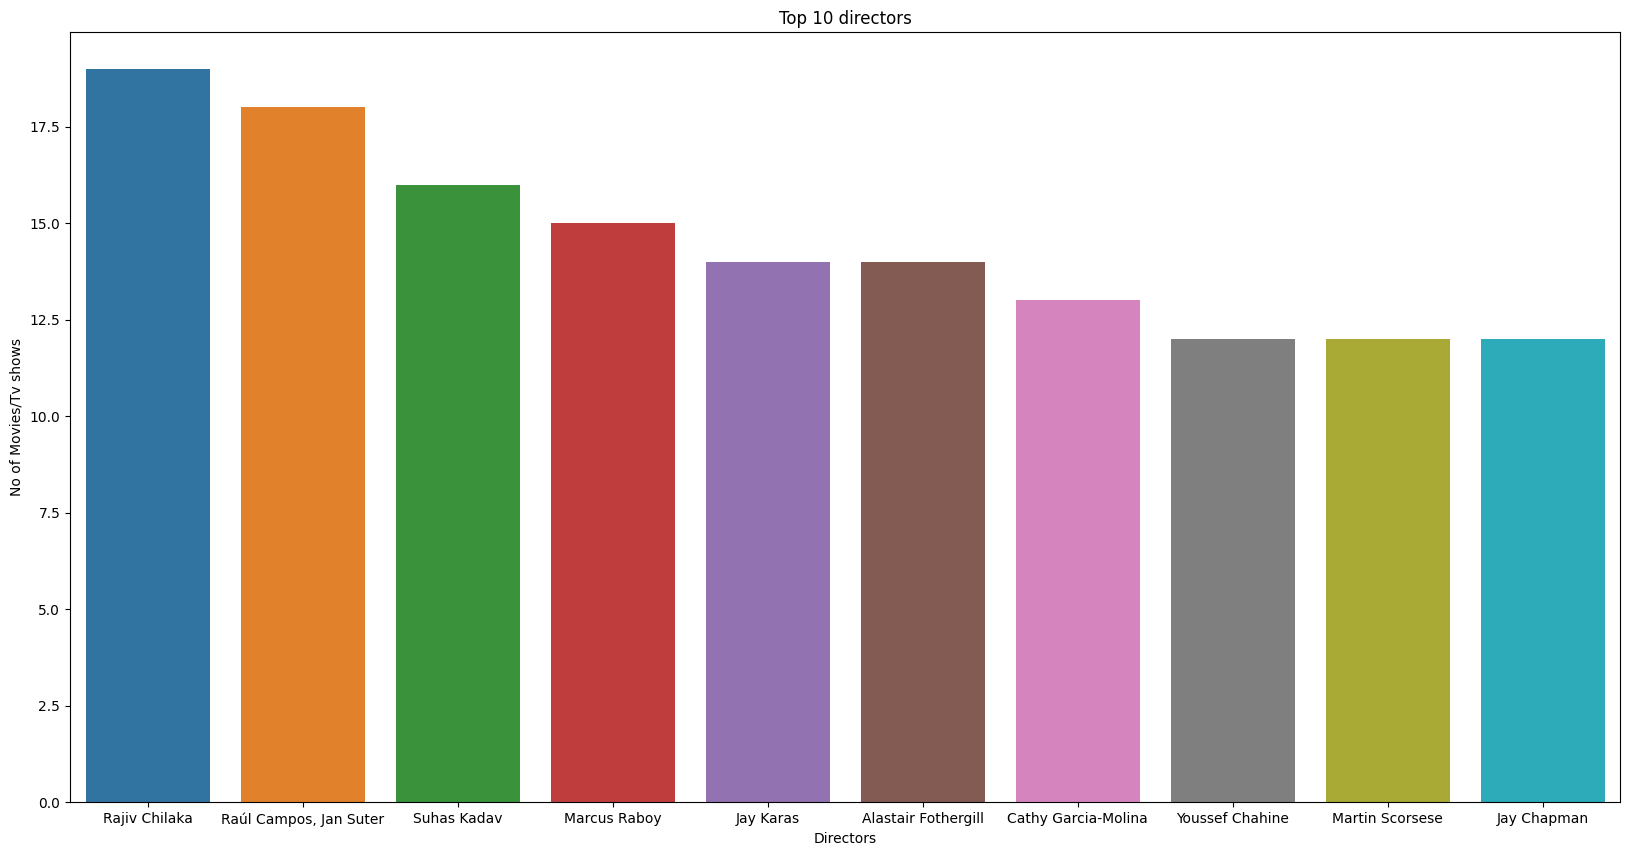

In [43]:
plt.figure(figsize=(20,10))
plt.title('Top 10 directors')
sns.barplot(x='director',y='count',data=top_10_directors)
plt.xlabel('Directors')
plt.ylabel('No of Movies/Tv shows')

Text(0, 0.5, 'No of Movies')

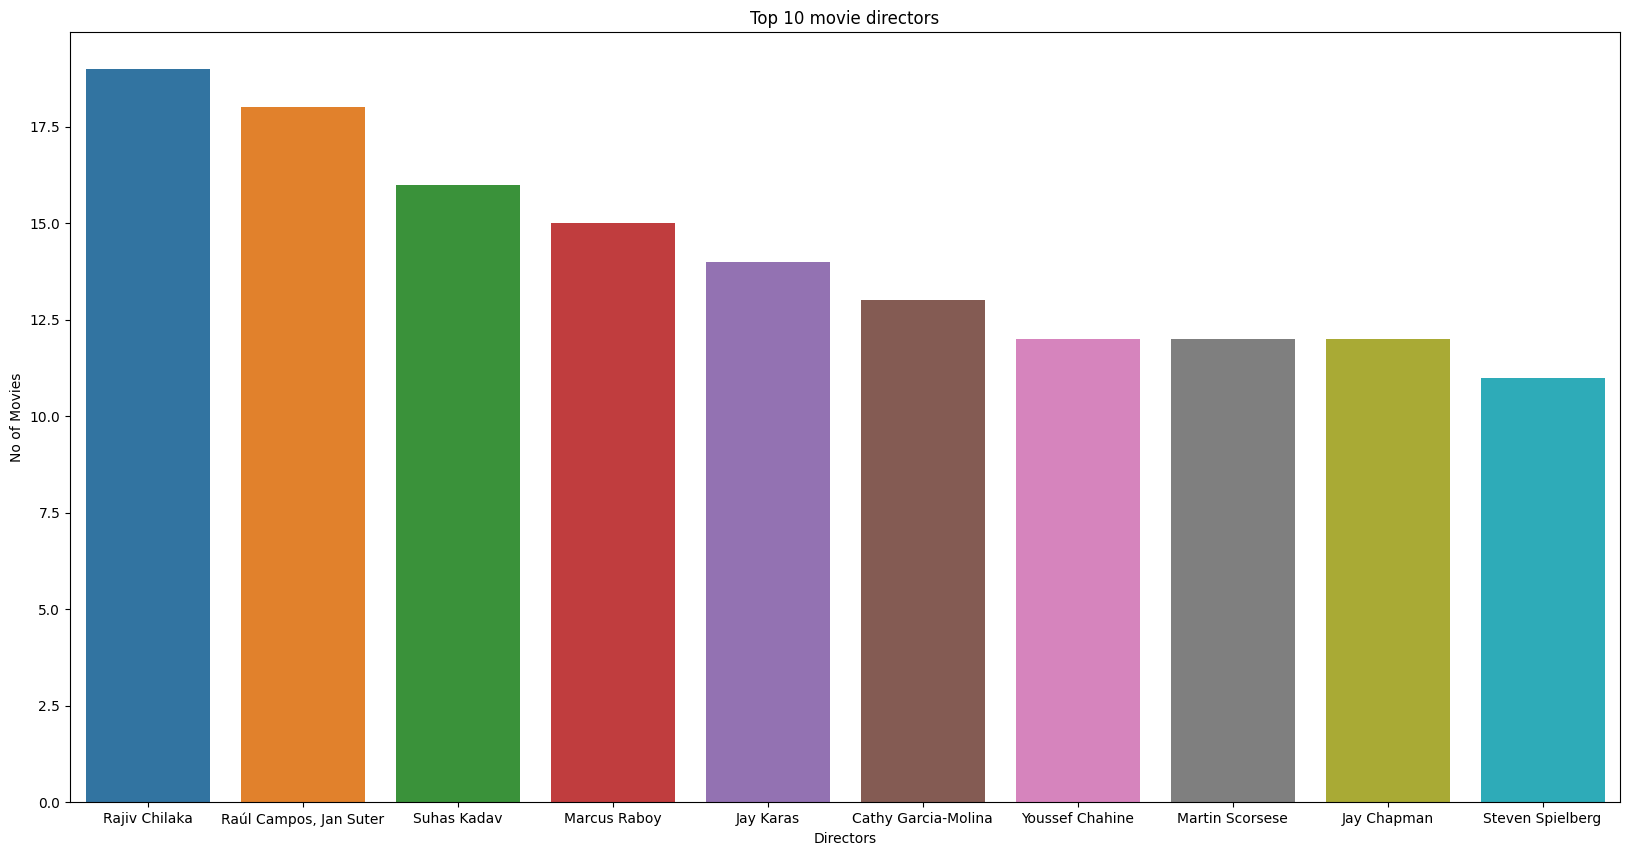

In [44]:
plt.figure(figsize=(20,10))
plt.title('Top 10 movie directors')
sns.barplot(x='director',y='count',data=top_10_movie_directors)
plt.xlabel('Directors')
plt.ylabel('No of Movies')

Text(0, 0.5, 'No of Tv shows')

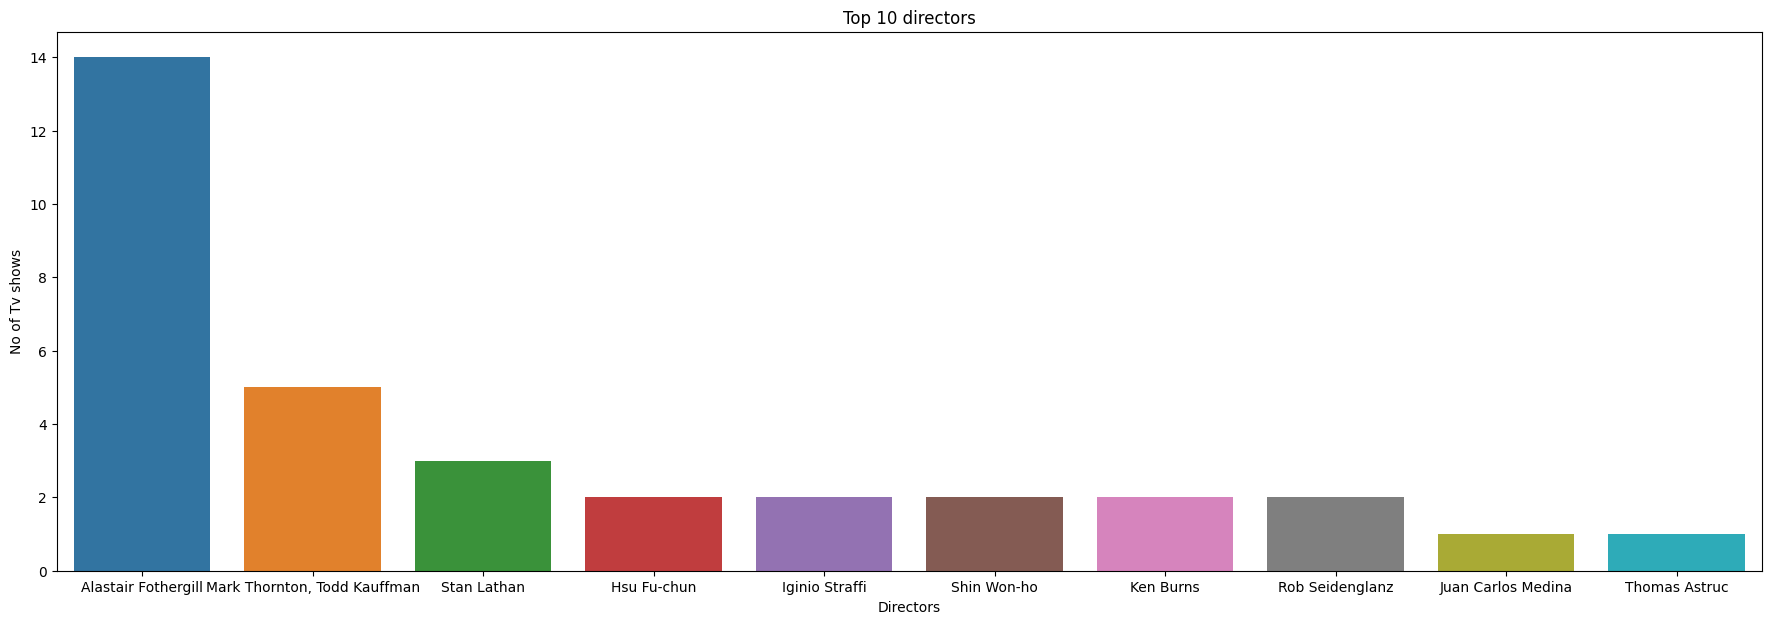

In [45]:
plt.figure(figsize=(22,7))
plt.title('Top 10 directors')
sns.barplot(x='director',y='count',data=top_10_TV_shows_directors)
plt.xlabel('Directors')
plt.ylabel('No of Tv shows')

Text(0, 0.5, 'No of Movies')

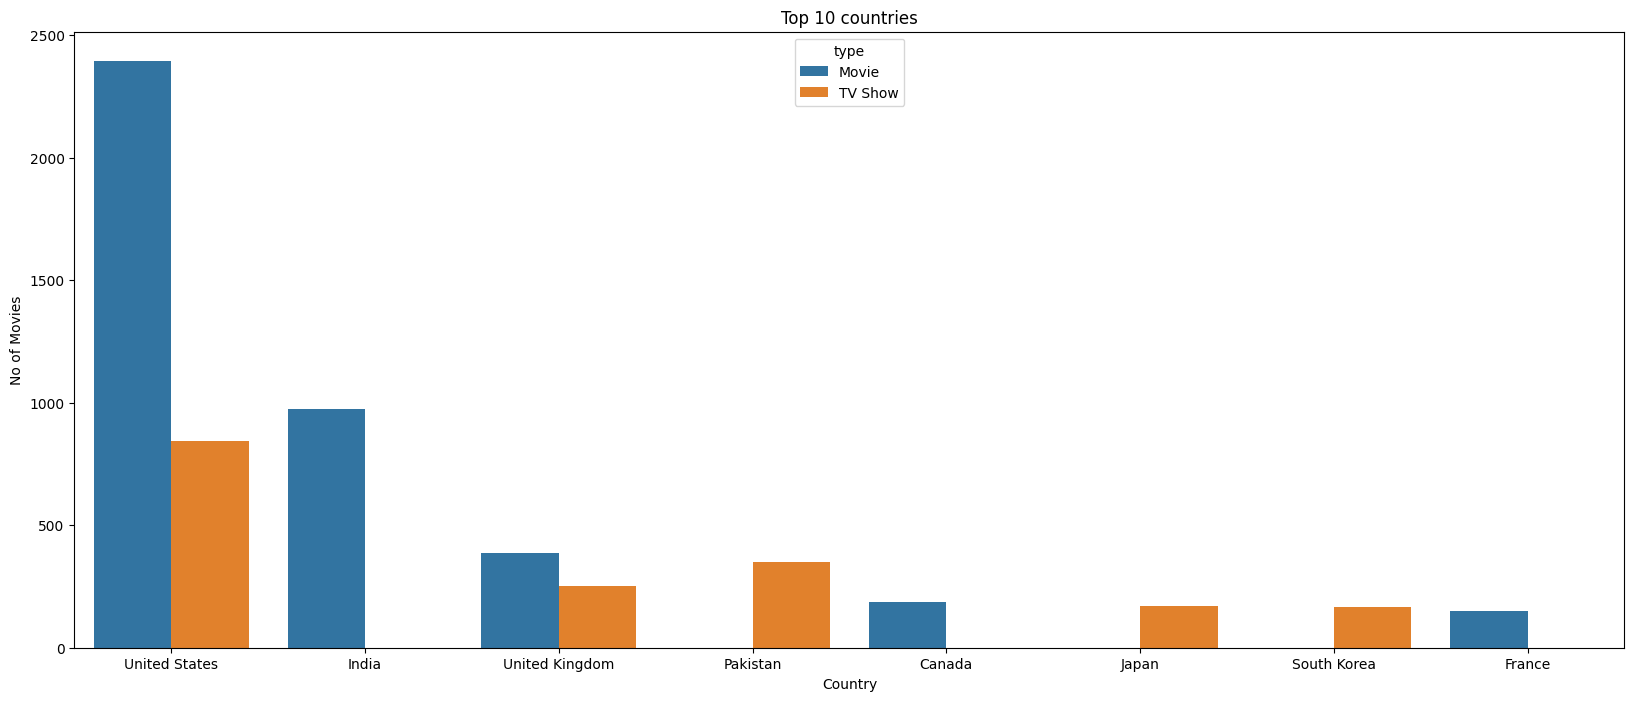

In [46]:
plt.figure(figsize=(20,8))
plt.title('Top 10 countries')
sns.barplot(x='country',y='count',data=top_10_countries, hue='type')
plt.xlabel('Country')
plt.ylabel('No of Movies')

Text(0, 0.5, 'No of Movies')

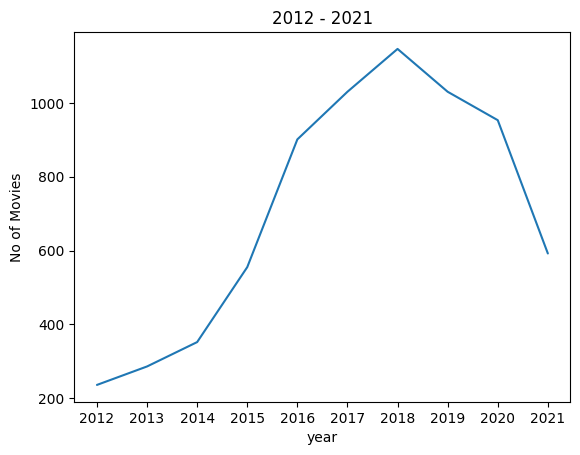

In [47]:
plt.title('2012 - 2021')
sns.set_style('whitegrid')
sns.lineplot(x='release_year', y='count', data=top_10_years, markers=True)
plt.xticks(top_10_years['release_year'])
plt.xlabel('year')
plt.ylabel('No of Movies')

Text(0, 0.5, 'No of Movies')

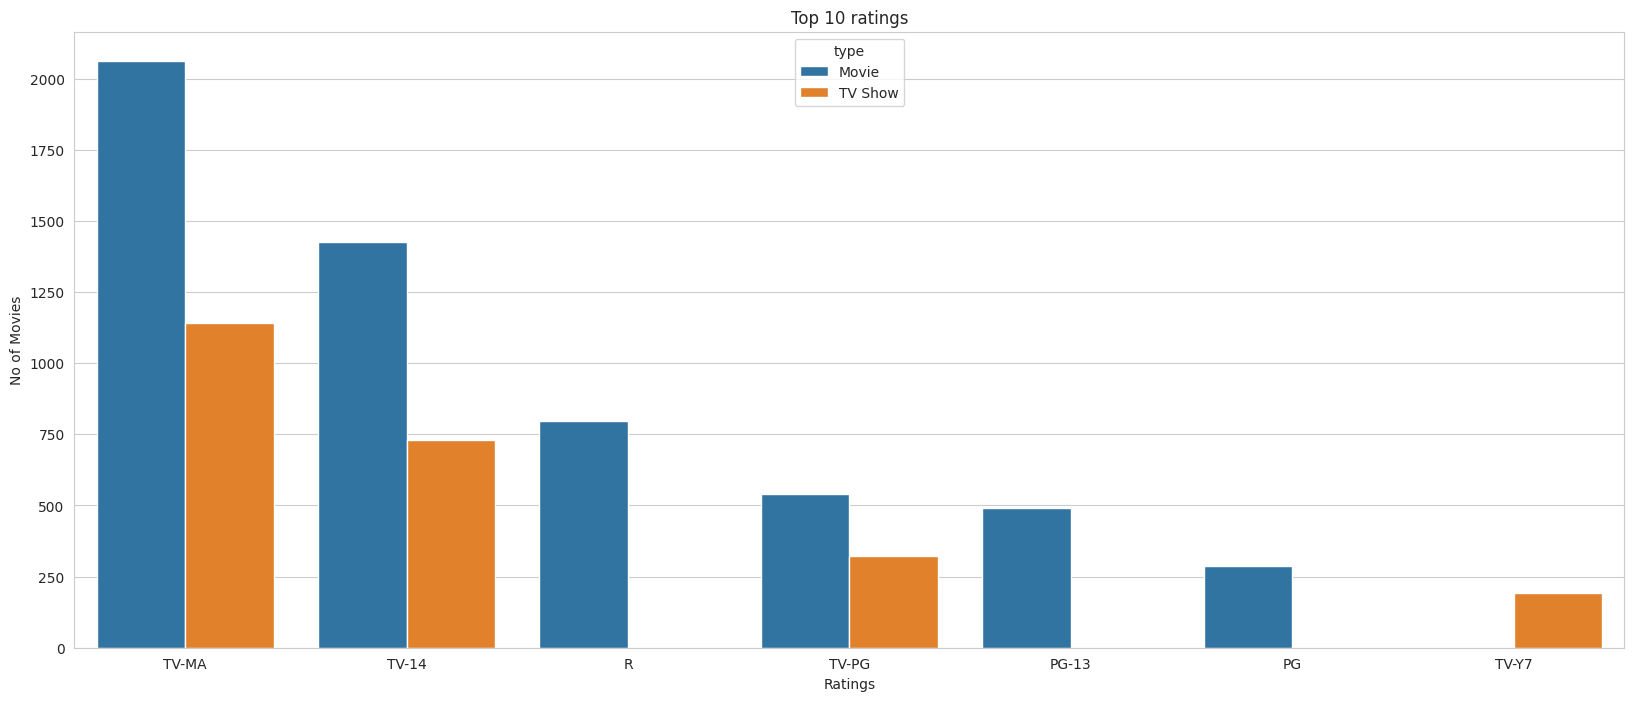

In [48]:
plt.figure(figsize=(20,8))
plt.title('Top 10 ratings')
sns.barplot(x='rating',y='count',data=top_10_ratings, hue='type')
plt.xlabel('Ratings')
plt.ylabel('No of Movies')

Text(0, 0.5, 'No of Movies')

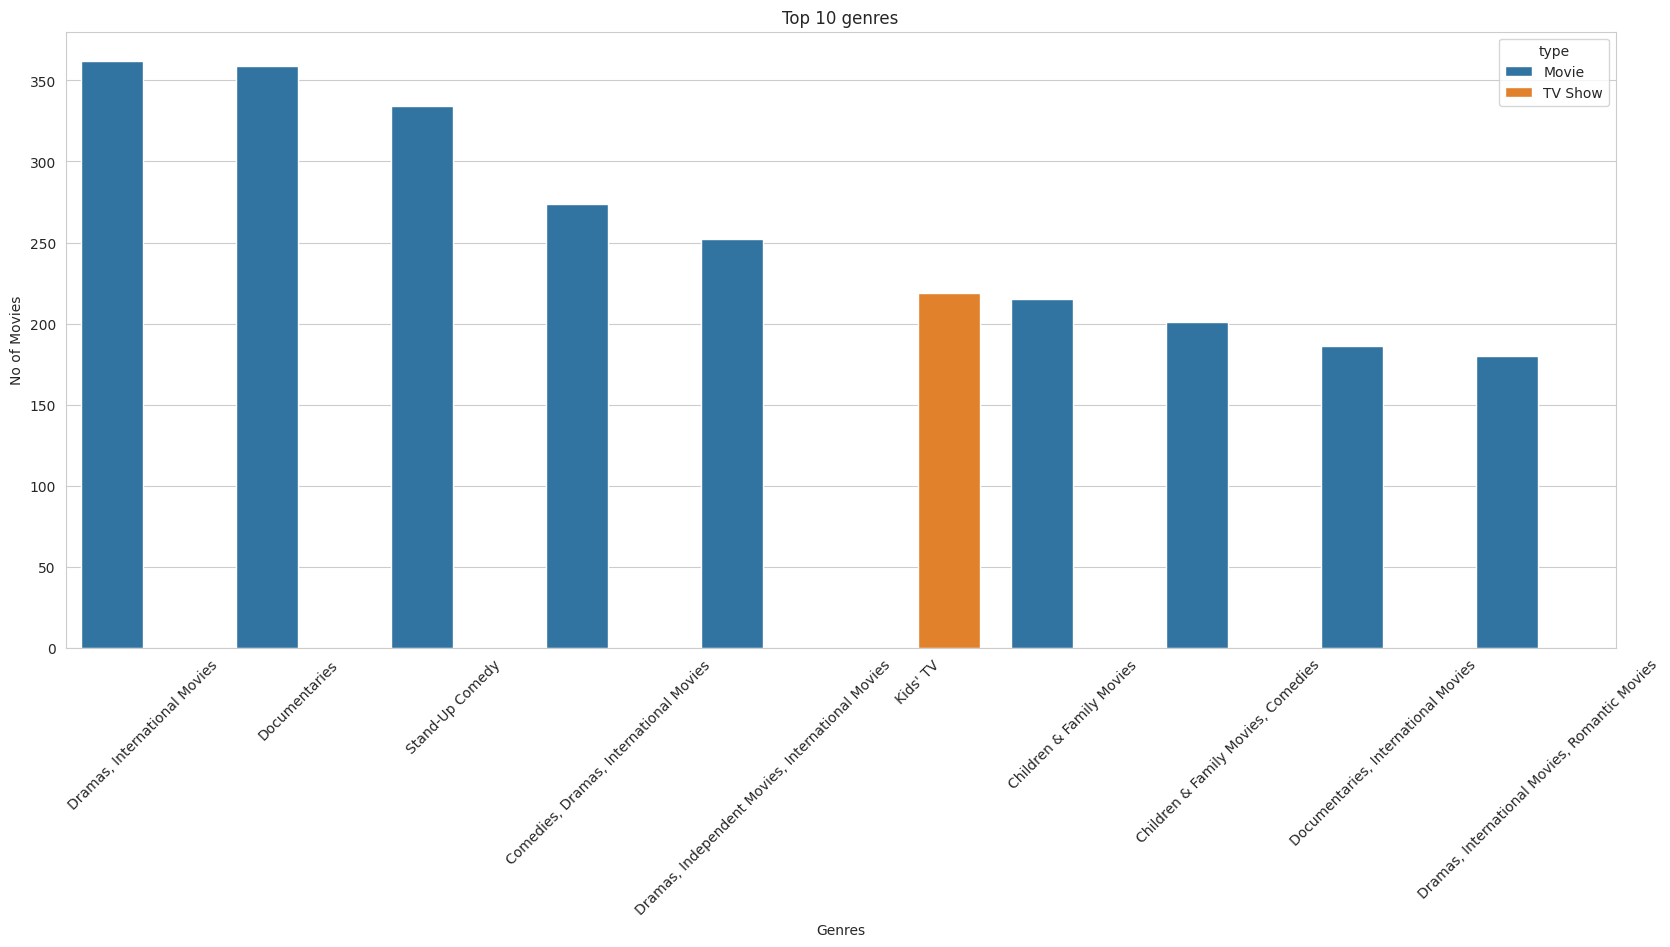

In [49]:
plt.figure(figsize=(20,8))
plt.title('Top 10 genres')
sns.barplot(x='listed_in',y='count',data=top_10_genres,hue='type')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('No of Movies')

Text(0.5, 1.0, 'Top 5 Durations')

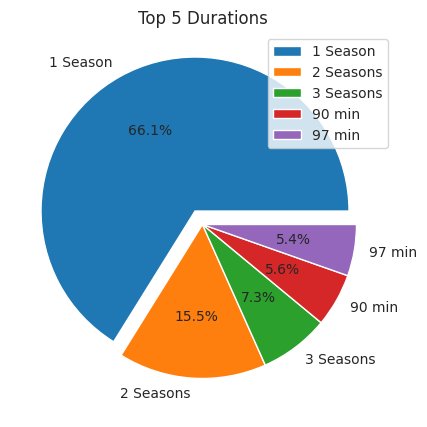

In [50]:
plt.figure(figsize=(20,5))
plt.pie(data=top_10_durations.head(5),x='count',labels='duration',autopct='%1.1f%%',explode=[0.1,0,0,0,0])
plt.legend(top_10_durations['duration'])
plt.title('Top 5 Durations')